<a href="https://colab.research.google.com/github/Edward1304/Signals-Theory-Edward/blob/main/NN_MLP/Estimate_PSD_NN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teoria de Señales  2024-1
## Edward Fabian Goyeneche Velandia -Ingenieria Electronica.
### Universidad Nacional de Colombia - Sede Manizales.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.neural_network import MLPRegressor
from scipy. signal import welch


### Señal  Original  $\frac{1}{3}$

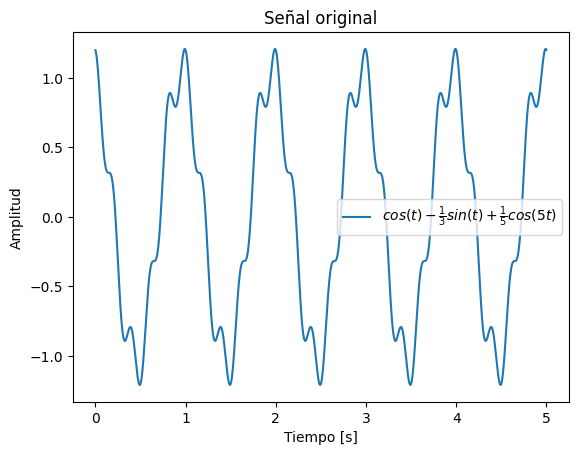

In [2]:
import numpy as np

# Generar la señal original
def generate_original_signal(w, t):
    signal = np.cos(w * t) - (1/3) * np.sin(w * t) + (1/5) * np.cos(5 * w * t)
    return signal

fs = 1000
T = 5
w = 2 * np.pi
t = np.linspace(0, T, int(fs * T), endpoint=False)

original_signal = generate_original_signal(w, t)


plt.plot(t, original_signal)
plt.title("Señal original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(["$cos(t) - \\frac{1}{3}sin(t) + \\frac{1}{5}cos(5t)$"])
plt.show()



### Matriz de la señal con distinto Ruido Blanco Gaussiano

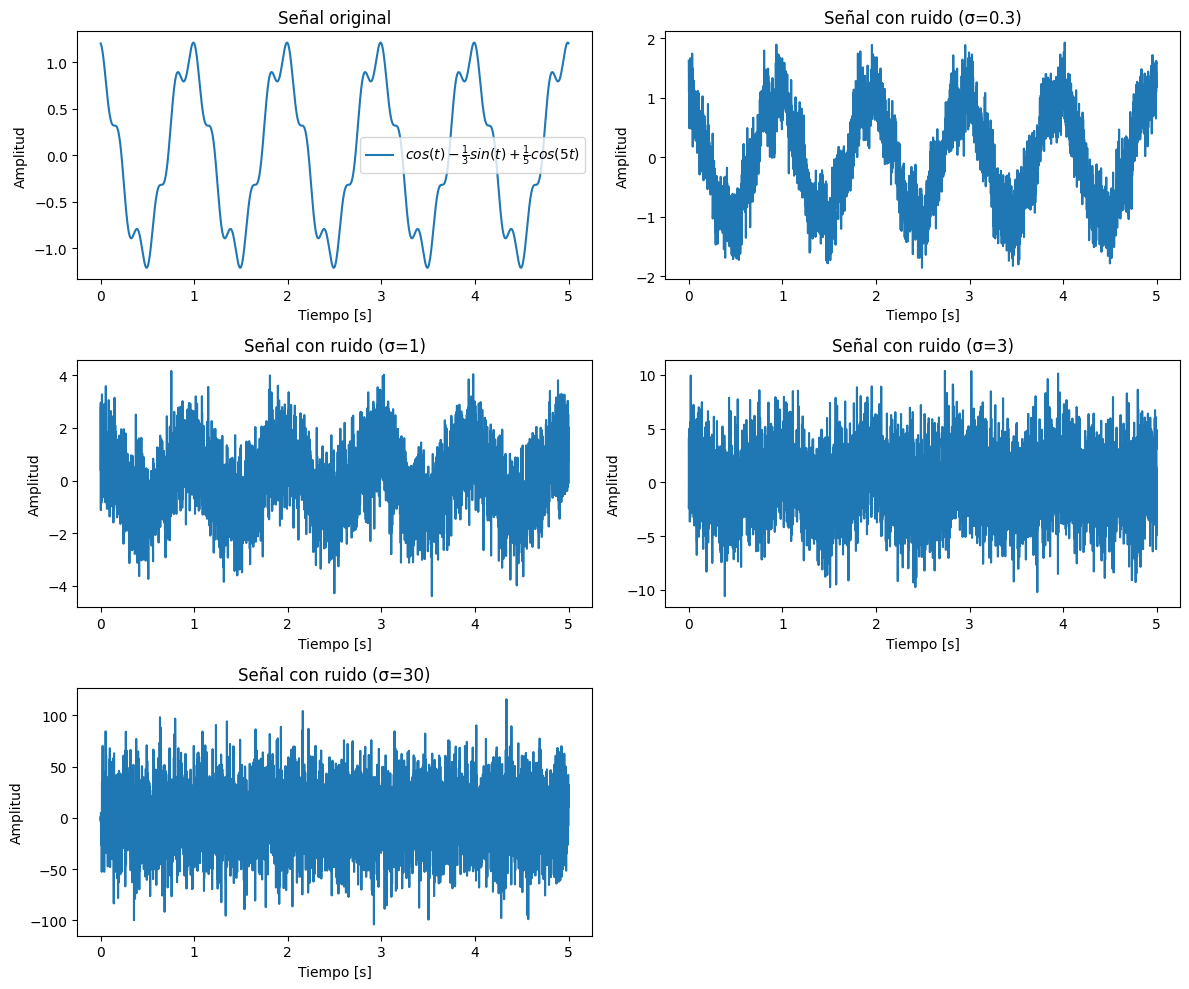

[[ 1.2         1.19778719  1.19533771 ...  1.20521756  1.20371507
   1.20197595]
 [ 1.62279494  1.26474889  1.098849   ...  1.5898251   1.17718921
   1.17770928]
 [ 0.40839134  2.96111733 -1.12331387 ...  0.55679485 -0.10703809
   2.00880979]
 [ 4.07569331 -2.42775463 -1.36302522 ... -4.95081391  4.90798309
   3.16093344]
 [-1.64503375  1.34796509 -3.88031797 ...  9.91297113 32.5096575
  -6.89224422]]
(5, 5000)


In [3]:

noise_levels=[ 0.3,1,3,30]

signal_matrix = np.zeros((len(noise_levels),+1, len(t)))
signal_matrix[0,:]= original_signal



signals_matrix = np.zeros((len(noise_levels) + 1, len(t)))
signals_matrix[0, :] = original_signal

# Añadir ruido y almacenar en la matriz
for i, noise_level in enumerate(noise_levels):
    noisy_signal = original_signal + np.random.normal(0, noise_level, original_signal.shape)
    signals_matrix[i + 1, :] = noisy_signal


plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.plot(t, signals_matrix[0, :])
plt.title("Señal original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(["$cos(t) - \\frac{1}{3}sin(t) + \\frac{1}{5}cos(5t)$"])

for i, noise_level in enumerate(noise_levels):
    plt.subplot(3, 2, i + 2)
    plt.plot(t, signals_matrix[i + 1, :])
    plt.title(f"Señal con ruido (σ={noise_level})")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

print (signals_matrix)
print (signals_matrix.shape)

### Aplica Welch

Matriz de PSDs:
[[1.19427999e-01 3.89336929e-01 1.01981351e-01 ... 1.21526796e-22
  8.95354954e-23 3.94361496e-23]
 [1.15695509e-01 3.81216553e-01 1.00269949e-01 ... 2.20060139e-04
  2.68618859e-04 2.26395053e-04]
 [1.25324138e-01 3.99572681e-01 1.07875711e-01 ... 9.82367127e-04
  7.19438440e-04 4.28252043e-04]
 [1.61103830e-01 4.90285086e-01 1.50672785e-01 ... 2.04698175e-02
  1.41996980e-02 1.09956845e-02]
 [6.05397836e-01 2.30999277e+00 2.96429976e+00 ... 1.61164348e+00
  1.58116945e+00 4.49669337e-01]]


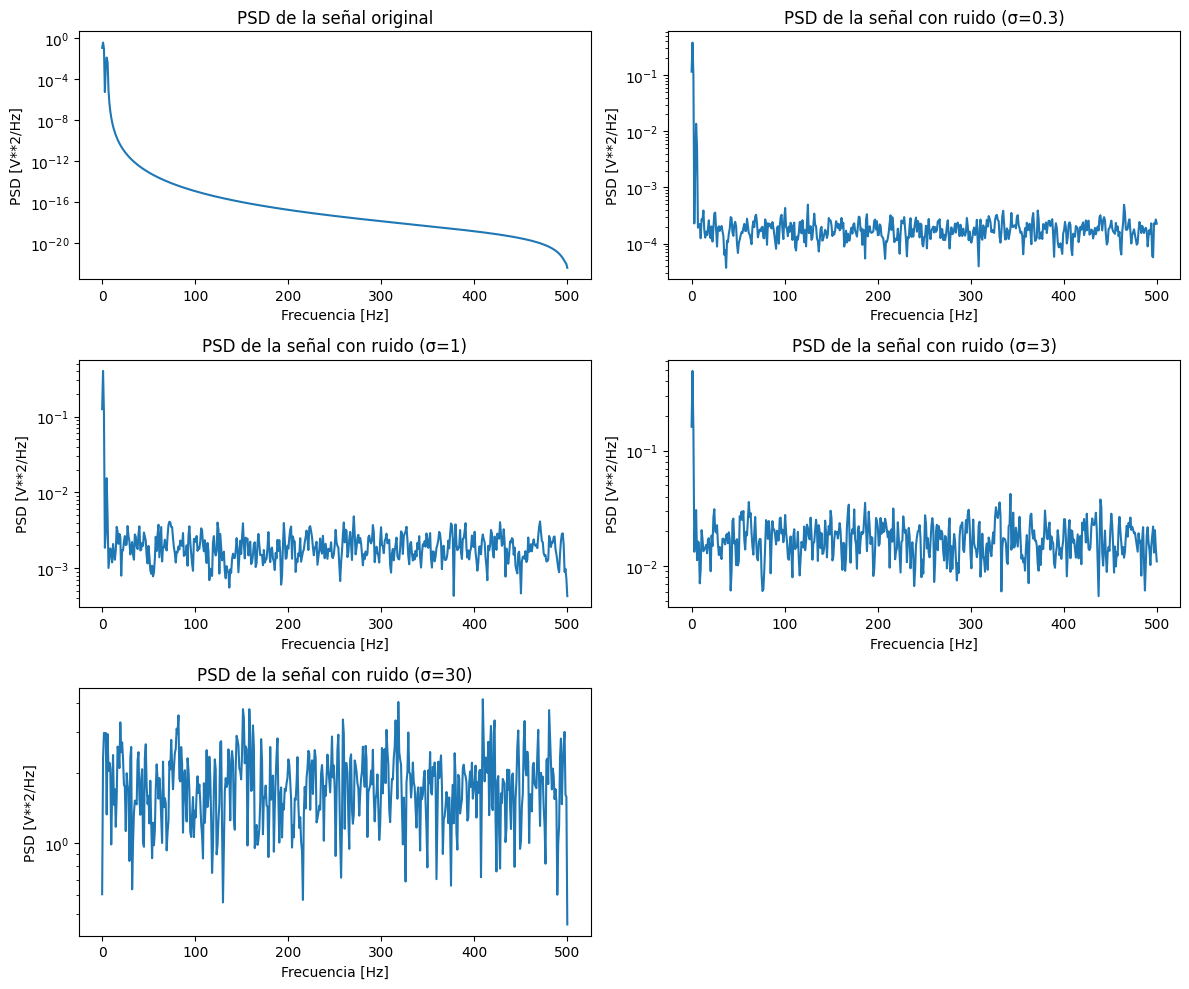

(5, 513)


In [4]:
psd_matrix = []
frequencies = None

for i in range(signals_matrix.shape[0]):
    f, Pxx = welch(signals_matrix[i, :], fs, nperseg=1024)
    if frequencies is None:
        frequencies = f
    psd_matrix.append(Pxx)

psd_matrix = np.array(psd_matrix)

# Imprimir la matriz de PSDs
print("Matriz de PSDs:")
print(psd_matrix)

# Graficar la PSD utilizando el método de Welch
plt.figure(figsize=(12, 10))
for i in range(psd_matrix.shape[0]):
    plt.subplot(3, 2, i + 1)
    plt.semilogy(frequencies, psd_matrix[i, :])
    if i == 0:
        plt.title("PSD de la señal original")
    else:
        plt.title(f"PSD de la señal con ruido (σ={noise_levels[i-1]})")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("PSD [V**2/Hz]")

plt.tight_layout()
plt.show()

print (psd_matrix.shape)

### Separa los datos de entrenamiento


In [5]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(signals_matrix, psd_matrix, test_size=0.2, random_state=42)

# Imprimir los conjuntos de entrenamiento y prueba
print("Conjunto de entrenamiento (X_train):")
print(X_train)
print("Conjunto de prueba (X_test):")
print(X_test)
print("Etiquetas de entrenamiento (y_train):")
print(y_train)
print("Etiquetas de prueba (y_test):")
print(y_test)


Conjunto de entrenamiento (X_train):
[[-1.64503375  1.34796509 -3.88031797 ...  9.91297113 32.5096575
  -6.89224422]
 [ 0.40839134  2.96111733 -1.12331387 ...  0.55679485 -0.10703809
   2.00880979]
 [ 1.2         1.19778719  1.19533771 ...  1.20521756  1.20371507
   1.20197595]
 [ 4.07569331 -2.42775463 -1.36302522 ... -4.95081391  4.90798309
   3.16093344]]
Conjunto de prueba (X_test):
[[1.62279494 1.26474889 1.098849   ... 1.5898251  1.17718921 1.17770928]]
Etiquetas de entrenamiento (y_train):
[[6.05397836e-01 2.30999277e+00 2.96429976e+00 ... 1.61164348e+00
  1.58116945e+00 4.49669337e-01]
 [1.25324138e-01 3.99572681e-01 1.07875711e-01 ... 9.82367127e-04
  7.19438440e-04 4.28252043e-04]
 [1.19427999e-01 3.89336929e-01 1.01981351e-01 ... 1.21526796e-22
  8.95354954e-23 3.94361496e-23]
 [1.61103830e-01 4.90285086e-01 1.50672785e-01 ... 2.04698175e-02
  1.41996980e-02 1.09956845e-02]]
Etiquetas de prueba (y_test):
[[1.15695509e-01 3.81216553e-01 1.00269949e-01 2.28429565e-04
  2.33454

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 33.6425 - mae: 2.9383 - val_loss: 0.5654 - val_mae: 0.5934
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 91.4199 - mae: 4.5444 - val_loss: 0.4012 - val_mae: 0.4976
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 40.2295 - mae: 3.0567 - val_loss: 0.3289 - val_mae: 0.4561
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - loss: 24.9197 - mae: 2.4126 - val_loss: 0.3143 - val_mae: 0.4515
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step - loss: 10.7149 - mae: 1.5802 - val_loss: 0.3159 - val_mae: 0.4535
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 8.7082 - mae: 1.4383 - val_loss: 0.3216 - val_mae: 0.4571
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 7.0384 - mae: 1.3251 - val_loss: 0.3296 - val_mae: 0.4598
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 4.7226 - mae: 1.0890 - val_loss: 0.3389 - val_mae: 0.4631
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - 

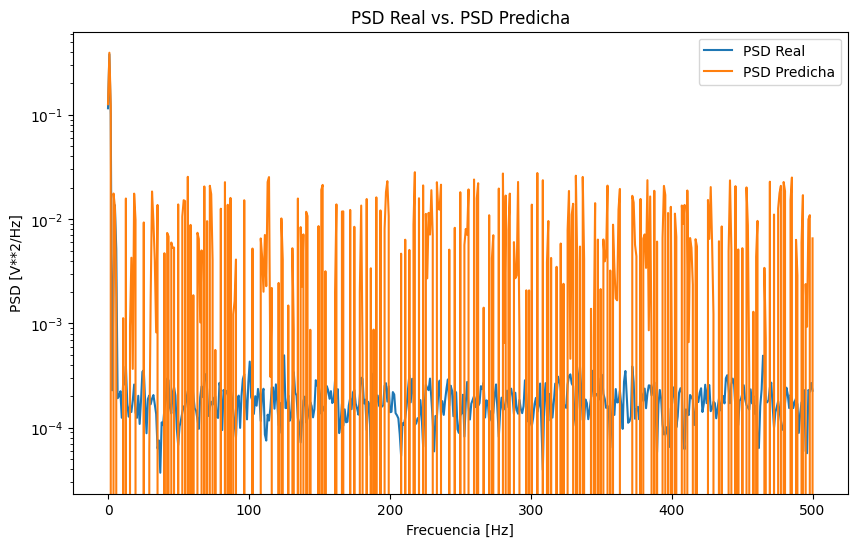

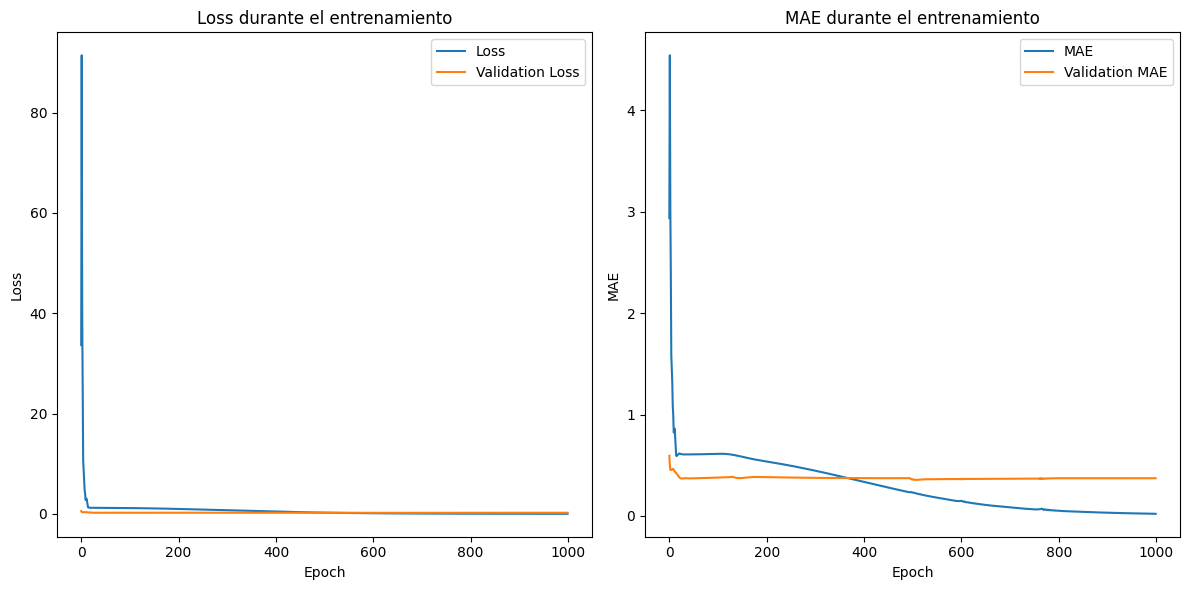

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History
from sklearn.metrics import mean_squared_error # Import the missing function

#Definir el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1])
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) # Now you can use the function
print(f"Mean Squared Error: {mse}")

# Graficar la PSD real vs. la PSD predicha para una señal de prueba
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, y_test[0], label='PSD Real')
plt.semilogy(frequencies, y_pred[0], label='PSD Predicha')
plt.title('PSD Real vs. PSD Predicha')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.show()

# Graficar las métricas de entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()